In [1]:
#Palustre, James Harold A.
#COE 005 - ECE41S1
#Homework 1 - SMS Spam Classification Using Neural Networks

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import tensorflow as tf  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
#Data Preparation
data = pd.read_csv('spam.csv',encoding='latin-1')

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
#print(data.head())
tags = data["label"]
texts = data["text"]

In [4]:
#Classify label as 0 and 1
data['label'].unique()
label = {'spam': 1,'ham': 0}
data['label'].replace(label, inplace=True)

In [5]:
# Separate tags and texts into training and test sets
training_size = int(len(texts) * 0.8)

training_texts = texts[0:training_size]
testing_texts = texts[training_size:]
training_tags = tags[0:training_size]
testing_tags = tags[training_size:]

# Make labels into numpy arrays
training_tags_final = np.array(training_tags)
testing_tags_final = np.array(testing_tags)

In [6]:
#Tokenize Dataset 
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_texts)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_texts)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [7]:
padded.shape

(4457, 100)

In [8]:
from keras import Sequential
from keras.layers import Dense

#NEURAL NETWORK

model = Sequential()
model.add(Dense(20, input_dim=100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
num_epochs = 100
history=model.fit(padded, training_tags_final, epochs=num_epochs, validation_data=(testing_padded, testing_tags_final))

Epoch 1/100
140/140 [==============================] - 2s 6ms/step - loss: 1.1021 - accuracy: 0.1351 - val_loss: 0.7637 - val_accuracy: 0.1300
Epoch 2/100
140/140 [==============================] - 1s 4ms/step - loss: 0.6301 - accuracy: 0.7153 - val_loss: 0.5361 - val_accuracy: 0.8700
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.8649 - val_loss: 0.4616 - val_accuracy: 0.8700
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8649 - val_loss: 0.4278 - val_accuracy: 0.8700
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.8649 - val_loss: 0.4103 - val_accuracy: 0.8700
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8649 - val_loss: 0.4003 - val_accuracy: 0.8700
Epoch 7/100
140/140 [==============================] - 1s 4ms/step - loss: 0.4044 - accuracy: 0.8649 - val_loss: 0.3941 - val_accuracy: 0.8700

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


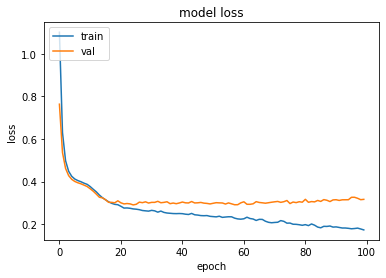

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
data = pd.read_csv('output_spam.csv',encoding='latin-1')

data = data.rename(columns={"ï»¿":'labels', "text":'texts'})
data.head()

,labels,texts
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...


In [12]:
messages = data['texts'].astype(str)
print(messages)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more likely that the message is spam
for x in range(len(messages)):
  print(messages[x])
  print(classes[x])
  print('\n')

0     Feel Yourself That You Are Always Happy.. Slow...
1     staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2                           Send me yetty's number pls.
3     Hey so this sat are we going for the intro pil...
4     I got it before the new year cos yetunde said ...
5     Hey we can go jazz power yoga hip hop kb and y...
6     Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7                                Morning only i can ok.
8                                  Wat time Ã_ finish?
9                 Shant disturb u anymore... Jia you...
10    4mths half price Orange line rental & latest c...
11    Your opinion about me? 1. Over 2. Jada 3. Kusr...
12    MOON has come to color your dreams, STARS to m...
13    You are a winner U have been specially selecte...
14    Unless it's a situation where YOU GO GURL woul...
15    Awww dat is sweet! We can think of something t...
16                              Bring tat cd don forget
17    Single line with a big meaning::::: \Miss 